In [3]:
import pandas as pd
import numpy as np
import seaborn as sns                                                                                                       
from matplotlib import pyplot as plt

In [4]:
# customer_data = pd.read_csv('../dane/credit_scoring_kaggle/train.csv', sep=',')
# customer_data = pd.read_excel('../dane/credit_scoring_kaggle/train_cleaned.xlsx')
customer_data = pd.read_csv('../data/Lending Club Loan Data/X.csv')
target = pd.read_csv('../data/Lending Club Loan Data/target.csv')
customer_data['target'] = target['y']
pd.options.display.max_columns = None
customer_data.head(10)

,funded_amnt,interest_rate,monthly_payment,grade,emp_title,emp_length,home_ownership_status,annual_income,verification_status,loan_purpose,addr_state,dept_paym_income_ratio,num_30+_delinq_in_2yrs,num_inq_in_6mths,mths_since_last_delinq,num_open_credit_lines,num_derogatory_pub_rec,total_credit_revolving_bal,used_credit_share,tot_num_credit_lines,initial_list_status,remaining_princ_for_tot_amnt_fund,paym_rec_for_tot_amnt_fund,princ_rec,interest_rec,late_fees_rec,num_open_trades_in_6mths,num_installment_acc_op_in_12mths,num_installment_acc_op_in_24mths,mths_since_last_installment_acc_op,num_rev_trades_op_in_12mths,num_rev_trades_op_in_24mths,max_bal_owed,bal_to_cred_lim,num_inq,num_inq_in_12mths,mths_since_recent_bankcard_delinq,mths_since_recent_revol_delinq,disbursement_method,loan_term_months,issue_date_month,issue_date_year,region_code,earliest_cr_line_month,earliest_cr_line_year,target
0,2500,13.56,84.92,C1,Chef,10+ years,RENT,55000.0,Not Verified,debt_consolidation,NY,18.24,0,1,NaN,9,1,4341,10.3,34,w,2386.02,167.02,113.98,53.04,0.0,2.0,1.0,2.0,2.0,2.0,7.0,2137.0,28.0,1.0,2,NaN,NaN,Cash,36,Dec,2018,1,Apr,2001,0
1,30000,18.94,777.23,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,debt_consolidation,LA,26.52,0,0,71.0,13,1,12315,24.2,44,w,29387.75,1507.11,612.25,894.86,0.0,4.0,2.0,3.0,3.0,4.0,5.0,998.0,57.0,2.0,2,NaN,NaN,Cash,60,Dec,2018,7,Jun,1987,0
2,5000,17.97,180.69,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,debt_consolidation,MI,10.51,0,0,NaN,8,0,4599,19.1,13,w,4787.21,353.89,212.79,141.10,0.0,0.0,0.0,2.0,14.0,0.0,2.0,0.0,35.0,1.0,0,NaN,NaN,Cash,36,Dec,2018,4,Apr,2011,0
3,4000,18.94,146.51,D2,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,debt_consolidation,WA,16.74,0,0,NaN,10,0,5468,78.1,13,w,3831.93,286.71,168.07,118.64,0.0,1.0,3.0,5.0,5.0,0.0,0.0,3761.0,70.0,2.0,3,NaN,NaN,Cash,36,Dec,2018,9,Feb,2006,0
4,30000,16.14,731.78,C4,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,debt_consolidation,MD,26.35,0,0,NaN,12,0,829,3.6,26,w,29339.02,1423.21,660.98,762.23,0.0,3.0,3.0,5.0,4.0,2.0,4.0,516.0,54.0,1.0,0,NaN,NaN,Cash,60,Dec,2018,2,Dec,2000,0
5,5550,15.02,192.45,C3,Director COE,10+ years,MORTGAGE,152500.0,Not Verified,credit_card,IN,37.94,0,3,NaN,18,0,53854,48.1,44,w,5302.50,377.95,247.50,130.45,0.0,1.0,2.0,3.0,4.0,1.0,4.0,17584.0,58.0,2.0,6,NaN,NaN,Cash,36,Dec,2018,4,Sep,2002,0
6,2000,17.97,72.28,D1,Account Manager,4 years,RENT,51000.0,Source Verified,debt_consolidation,IL,2.40,0,1,NaN,1,0,0,0.0,9,w,1914.71,141.56,85.29,56.27,0.0,0.0,2.0,3.0,7.0,0.0,1.0,0.0,100.0,0.0,1,NaN,NaN,Cash,36,Dec,2018,6,Nov,2004,0
7,6000,13.56,203.79,C1,Assistant Director,10+ years,RENT,65000.0,Source Verified,credit_card,IN,30.10,0,0,NaN,19,0,38476,69.3,37,w,5864.01,201.53,135.99,65.54,0.0,0.0,0.0,1.0,23.0,0.0,2.0,9413.0,74.0,1.0,0,NaN,NaN,DirectPay,36,Dec,2018,4,Nov,1997,0
8,5000,17.97,180.69,D1,Legal Assistant III,10+ years,MORTGAGE,53580.0,Source Verified,debt_consolidation,FL,21.16,0,1,32.0,8,0,8018,35.2,38,w,4786.79,353.89,213.21,140.68,0.0,5.0,5.0,5.0,3.0,1.0,6.0,3132.0,73.0,2.0,4,33.0,32.0,Cash,36,Dec,2018,3,Aug,1998,0
9,6000,14.47,206.44,C2,NaN,< 1 year,OWN,300000.0,Not Verified,debt_consolidation,CT,17.43,1,1,17.0,38,0,65950,49.8,58,w,5730.20,405.64,269.80,135.84,0.0,1.0,1.0,3.0,7.0,1.0,12.0,15926.0,48.0,2.0,2,NaN,17.0,Cash,36,Dec,2018,0,Apr,2002,0


### We have 2 139 643 records and 46 columns

In [5]:
customer_data.shape

(2139643, 46)

Data is inbalanced, around 13 % of data refer to the non-default case (0), other refer to default case (1)

In [6]:
from sklearn.model_selection import train_test_split
customer_data, _ = train_test_split(customer_data, train_size=0.25, stratify=customer_data['target'], random_state=68)
customer_data['target'].value_counts()

target
0    464981
1     69929
Name: count, dtype: int64

### Dropping columns with many NaN values

In [7]:
customer_data.isna().sum()

funded_amnt                                0
interest_rate                              0
monthly_payment                            0
grade                                      0
emp_title                              36980
emp_length                             32428
home_ownership_status                      0
annual_income                              0
verification_status                        0
loan_purpose                               0
addr_state                                 0
dept_paym_income_ratio                     0
num_30+_delinq_in_2yrs                     0
num_inq_in_6mths                           0
mths_since_last_delinq                272019
num_open_credit_lines                      0
num_derogatory_pub_rec                     0
total_credit_revolving_bal                 0
used_credit_share                          0
tot_num_credit_lines                       0
initial_list_status                        0
remaining_princ_for_tot_amnt_fund          0
paym_rec_f

In [8]:
major_nans_in_columns = customer_data.isna().sum() > 100000
customer_data = customer_data.loc[:, ~major_nans_in_columns]

In [9]:
customer_data = customer_data.dropna().reset_index(drop=True)
customer_data.shape

(497725, 34)

In [10]:
customer_data.head()

,funded_amnt,interest_rate,monthly_payment,grade,emp_title,emp_length,home_ownership_status,annual_income,verification_status,loan_purpose,addr_state,dept_paym_income_ratio,num_30+_delinq_in_2yrs,num_inq_in_6mths,num_open_credit_lines,num_derogatory_pub_rec,total_credit_revolving_bal,used_credit_share,tot_num_credit_lines,initial_list_status,remaining_princ_for_tot_amnt_fund,paym_rec_for_tot_amnt_fund,princ_rec,interest_rec,late_fees_rec,num_inq_in_12mths,disbursement_method,loan_term_months,issue_date_month,issue_date_year,region_code,earliest_cr_line_month,earliest_cr_line_year,target
0,15000,19.53,393.50,D5,maintenance supervisor,10+ years,MORTGAGE,55000.0,Not Verified,debt_consolidation,MI,26.82,0,1,10,1,81,0.3,14,w,0.00,16723.100000,15000.00,1723.10,0.0,2,Cash,60,Mar,2016,4,Jun,2004,0
1,40000,7.21,1238.93,A3,Owner,8 years,RENT,200000.0,Verified,home_improvement,NY,3.31,0,1,11,0,8477,12.5,17,w,0.00,42871.625510,40000.00,2871.63,0.0,3,Cash,36,Sep,2017,1,May,2000,0
2,19200,10.49,412.59,B3,Pos specialist,10+ years,RENT,73000.0,Not Verified,debt_consolidation,CA,14.02,0,0,7,0,6588,37.9,19,w,0.00,20860.855122,19200.00,1660.86,0.0,0,Cash,60,Aug,2016,9,Aug,2003,0
3,25000,11.53,550.20,B5,Estimator,10+ years,OWN,80000.0,Not Verified,credit_card,FL,34.55,0,0,16,0,23490,60.1,50,w,0.00,30745.042897,25000.00,5745.04,0.0,0,Cash,60,Oct,2015,3,May,1994,0
4,9600,23.40,373.62,E1,Sales VP,3 years,RENT,100000.0,Not Verified,small_business,OH,15.79,0,4,19,0,4677,19.2,51,w,9223.52,728.520000,376.48,352.04,0.0,5,Cash,36,Dec,2018,4,Nov,2004,0


In [11]:
(customer_data['funded_amnt'].value_counts().index.min(),
customer_data['funded_amnt'].value_counts().index.max())

(500, 40000)

In [12]:
# customer_data["Score_point"].value_counts()

In [13]:
# customer_data["Credit_Score"].value_counts()

In [14]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497725 entries, 0 to 497724
Data columns (total 34 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   funded_amnt                        497725 non-null  int64  
 1   interest_rate                      497725 non-null  float64
 2   monthly_payment                    497725 non-null  float64
 3   grade                              497725 non-null  object 
 4   emp_title                          497725 non-null  object 
 5   emp_length                         497725 non-null  object 
 6   home_ownership_status              497725 non-null  object 
 7   annual_income                      497725 non-null  float64
 8   verification_status                497725 non-null  object 
 9   loan_purpose                       497725 non-null  object 
 10  addr_state                         497725 non-null  object 
 11  dept_paym_income_ratio             4977

In [15]:
"""describe numeric data"""
pd.set_option('display.float_format', '{:.2f}'.format)
numerical_data = customer_data.select_dtypes(["int32", "float32", "int64", "float64"]).dropna()
numerical_data_describe = numerical_data.describe()
numerical_data_describe.loc['unique'] = numerical_data.nunique()
numerical_data_describe.loc['var_coeff [%]'] = 100.0 * numerical_data_describe.loc['std'] / numerical_data_describe.loc['mean']
numerical_data_describe

,funded_amnt,interest_rate,monthly_payment,annual_income,dept_paym_income_ratio,num_30+_delinq_in_2yrs,num_inq_in_6mths,num_open_credit_lines,num_derogatory_pub_rec,total_credit_revolving_bal,used_credit_share,tot_num_credit_lines,remaining_princ_for_tot_amnt_fund,paym_rec_for_tot_amnt_fund,princ_rec,interest_rec,late_fees_rec,num_inq_in_12mths,loan_term_months,issue_date_year,region_code,earliest_cr_line_year,target
count,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00
mean,14978.37,13.06,444.28,80811.03,18.02,0.32,0.59,11.73,0.20,16832.38,50.77,24.38,3956.04,12273.84,9683.05,2447.02,1.49,1.50,42.88,2015.74,4.65,1999.67,0.13
std,9045.71,4.80,263.55,174272.38,8.36,0.89,0.90,5.66,0.58,22990.87,24.59,12.04,7061.85,9974.50,8365.20,2711.23,11.83,2.05,10.85,1.79,3.11,7.54,0.34
min,500.00,5.31,14.01,2300.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,-0.00,0.00,36.00,2007.00,0.00,1933.00,0.00
25%,8000.00,9.49,254.05,49000.00,11.77,0.00,0.00,8.00,0.00,6095.00,32.10,16.00,0.00,4643.68,3075.00,719.32,0.00,0.00,36.00,2015.00,2.00,1996.00,0.00
50%,12900.00,12.62,377.87,68000.00,17.52,0.00,0.00,11.00,0.00,11501.00,50.80,23.00,0.00,9639.00,7247.37,1530.93,0.00,1.00,36.00,2016.00,4.00,2001.00,0.00
75%,20000.00,15.80,587.50,95000.00,23.90,0.00,1.00,15.00,0.00,20445.00,69.70,31.00,5627.69,17249.87,14058.23,3127.41,0.00,2.00,60.00,2017.00,8.00,2005.00,0.00
max,40000.00,30.99,1719.83,110000000.00,49.96,36.00,32.00,101.00,49.00,2559552.00,182.80,162.00,39548.64,62948.99,40000.00,27948.99,955.92,41.00,60.00,2018.00,9.00,2015.00,1.00
unique,1546.00,642.00,59787.00,28087.00,4394.00,29.00,22.00,77.00,29.00,63560.00,1196.00,132.00,111919.00,423863.00,159447.00,293325.00,6956.00,38.00,2.00,12.00,10.00,70.00,2.00
var_coeff [%],60.39,36.74,59.32,215.65,46.40,280.71,152.45,48.28,294.99,136.59,48.43,49.38,178.51,81.27,86.39,110.80,795.15,136.84,25.31,0.09,66.85,0.38,259.88


In [16]:
credit_history_col_index = customer_data.columns.to_list().index('issue_date_year') + 1
customer_data.insert(credit_history_col_index, 'credit_history_age', customer_data['issue_date_year'] - customer_data['earliest_cr_line_year'])
customer_data = customer_data.drop(columns=['issue_date_month', 'issue_date_year', 'earliest_cr_line_month', 'earliest_cr_line_year'])

In [17]:
customer_data.head()

,funded_amnt,interest_rate,monthly_payment,grade,emp_title,emp_length,home_ownership_status,annual_income,verification_status,loan_purpose,addr_state,dept_paym_income_ratio,num_30+_delinq_in_2yrs,num_inq_in_6mths,num_open_credit_lines,num_derogatory_pub_rec,total_credit_revolving_bal,used_credit_share,tot_num_credit_lines,initial_list_status,remaining_princ_for_tot_amnt_fund,paym_rec_for_tot_amnt_fund,princ_rec,interest_rec,late_fees_rec,num_inq_in_12mths,disbursement_method,loan_term_months,credit_history_age,region_code,target
0,15000,19.53,393.50,D5,maintenance supervisor,10+ years,MORTGAGE,55000.00,Not Verified,debt_consolidation,MI,26.82,0,1,10,1,81,0.30,14,w,0.00,16723.10,15000.00,1723.10,0.00,2,Cash,60,12,4,0
1,40000,7.21,1238.93,A3,Owner,8 years,RENT,200000.00,Verified,home_improvement,NY,3.31,0,1,11,0,8477,12.50,17,w,0.00,42871.63,40000.00,2871.63,0.00,3,Cash,36,17,1,0
2,19200,10.49,412.59,B3,Pos specialist,10+ years,RENT,73000.00,Not Verified,debt_consolidation,CA,14.02,0,0,7,0,6588,37.90,19,w,0.00,20860.86,19200.00,1660.86,0.00,0,Cash,60,13,9,0
3,25000,11.53,550.20,B5,Estimator,10+ years,OWN,80000.00,Not Verified,credit_card,FL,34.55,0,0,16,0,23490,60.10,50,w,0.00,30745.04,25000.00,5745.04,0.00,0,Cash,60,21,3,0
4,9600,23.40,373.62,E1,Sales VP,3 years,RENT,100000.00,Not Verified,small_business,OH,15.79,0,4,19,0,4677,19.20,51,w,9223.52,728.52,376.48,352.04,0.00,5,Cash,36,14,4,0


In [18]:
numerical_data = customer_data.select_dtypes(['int32', 'float32', 'int64', 'float64'])
numerical_data_describe = numerical_data.describe()
numerical_data_describe.loc['unique'] = numerical_data.nunique()
numerical_data_describe.loc['var_coeff [%]'] = 100.0 * numerical_data_describe.loc['std'] / numerical_data_describe.loc['mean']
numerical_data_describe

,funded_amnt,interest_rate,monthly_payment,annual_income,dept_paym_income_ratio,num_30+_delinq_in_2yrs,num_inq_in_6mths,num_open_credit_lines,num_derogatory_pub_rec,total_credit_revolving_bal,used_credit_share,tot_num_credit_lines,remaining_princ_for_tot_amnt_fund,paym_rec_for_tot_amnt_fund,princ_rec,interest_rec,late_fees_rec,num_inq_in_12mths,loan_term_months,credit_history_age,region_code,target
count,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00
mean,14978.37,13.06,444.28,80811.03,18.02,0.32,0.59,11.73,0.20,16832.38,50.77,24.38,3956.04,12273.84,9683.05,2447.02,1.49,1.50,42.88,16.07,4.65,0.13
std,9045.71,4.80,263.55,174272.38,8.36,0.89,0.90,5.66,0.58,22990.87,24.59,12.04,7061.85,9974.50,8365.20,2711.23,11.83,2.05,10.85,7.36,3.11,0.34
min,500.00,5.31,14.01,2300.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,-0.00,0.00,36.00,0.00,0.00,0.00
25%,8000.00,9.49,254.05,49000.00,11.77,0.00,0.00,8.00,0.00,6095.00,32.10,16.00,0.00,4643.68,3075.00,719.32,0.00,0.00,36.00,11.00,2.00,0.00
50%,12900.00,12.62,377.87,68000.00,17.52,0.00,0.00,11.00,0.00,11501.00,50.80,23.00,0.00,9639.00,7247.37,1530.93,0.00,1.00,36.00,15.00,4.00,0.00
75%,20000.00,15.80,587.50,95000.00,23.90,0.00,1.00,15.00,0.00,20445.00,69.70,31.00,5627.69,17249.87,14058.23,3127.41,0.00,2.00,60.00,20.00,8.00,0.00
max,40000.00,30.99,1719.83,110000000.00,49.96,36.00,32.00,101.00,49.00,2559552.00,182.80,162.00,39548.64,62948.99,40000.00,27948.99,955.92,41.00,60.00,83.00,9.00,1.00
unique,1546.00,642.00,59787.00,28087.00,4394.00,29.00,22.00,77.00,29.00,63560.00,1196.00,132.00,111919.00,423863.00,159447.00,293325.00,6956.00,38.00,2.00,67.00,10.00,2.00
var_coeff [%],60.39,36.74,59.32,215.65,46.40,280.71,152.45,48.28,294.99,136.59,48.43,49.38,178.51,81.27,86.39,110.80,795.15,136.84,25.31,45.82,66.85,259.88


In [19]:
categorical_data = customer_data.select_dtypes(["object"]).dropna().reset_index(drop=True)
categorical_data.describe()

,grade,emp_title,emp_length,home_ownership_status,verification_status,loan_purpose,addr_state,initial_list_status,disbursement_method
count,497725,497725,497725,497725,497725,497725,497725,497725,497725
unique,35,166188,11,4,3,14,51,2,2
top,C1,Teacher,10+ years,MORTGAGE,Source Verified,debt_consolidation,CA,w,Cash
freq,31921,8763,178357,241621,205153,282505,70437,332985,481189


In [20]:
# (categoric_data["Amount_invested_monthly"].value_counts(),
# categoric_data["Monthly_Balance"].value_counts())

In [21]:
# categoric_data["ID"].value_counts()

In [22]:
(numerical_data.columns.size, categorical_data.columns.size)

(22, 9)

In [23]:
"""adjusting number of rows for subplot"""
def subplot_shape(df, subplot_cols=3):
    df_ncols = df.columns.size
    if df_ncols %subplot_cols == 0:
        return (int(df_ncols / subplot_cols), subplot_cols)
    else:
        return (df_ncols // subplot_cols + df_ncols % subplot_cols, subplot_cols)

"""function to draw distributions for variables (columns)"""
def draw_distribution(df, subplot_size, distributions_for_numerics=True, subplot_cols=3, barplot_max_cols=20, top_n_freq=5):
    plot_shape = subplot_shape(df, subplot_cols=subplot_cols)
    fig, axes = plt.subplots(plot_shape[0], plot_shape[1], figsize=subplot_size)
    axes = axes.flatten()
    num_cols = df.shape[1]
    distribution_type = {}
    keys = df.columns.values
    distribution_type = distribution_type.fromkeys(keys)

    for iter, (ax, col) in enumerate(zip(axes, df.columns)):
        top_frequent = ''
        data = df[col].dropna().reset_index(drop=True)
        val_counts = data.value_counts()
        if data.dtype == 'object':
            if len(val_counts.index) <= barplot_max_cols / 2:
                sns.barplot(x=val_counts.index, y=val_counts.values, ax=ax, edgecolor='black')
            else:
                top_frequent = f" - TOP {top_n_freq} categories"
                sns.barplot(x=val_counts.index[0:top_n_freq], y=val_counts.values[0:top_n_freq], ax=ax, edgecolor='black')
            plot_type = 'barplot'
        else:  # distributions_for_numerics:
            if len(val_counts.index) <= barplot_max_cols:
                sns.barplot(x=val_counts.index, y=val_counts.values, ax=ax, edgecolor='black')
                plot_type = 'barplot'
            else:
                sns.histplot(data=data, bins='auto', ax=ax, edgecolor='black')
                plot_type = 'histogram'
        ax.set_title(f"{col}{top_frequent}")
        ax.set_xlabel('')
        ax.set_ylabel('')
        distribution_type[col] = plot_type
        # Counter for drawing charts process
        print(f'\rDrawing distribution plots [{iter+1}/{num_cols}]', end='', flush=True)
    for i, item in enumerate(distribution_type.items()):
        if i == 0:
            print('\n')
        print(item)
    plt.tight_layout()
    plt.show()

In [24]:
subplot_shape(numerical_data)

(8, 3)

Drawing distribution plots [31/31]

('funded_amnt', 'histogram')
('interest_rate', 'histogram')
('monthly_payment', 'histogram')
('grade', 'barplot')
('emp_title', 'barplot')
('emp_length', 'barplot')
('home_ownership_status', 'barplot')
('annual_income', 'histogram')
('verification_status', 'barplot')
('loan_purpose', 'barplot')
('addr_state', 'barplot')
('dept_paym_income_ratio', 'histogram')
('num_30+_delinq_in_2yrs', 'histogram')
('num_inq_in_6mths', 'histogram')
('num_open_credit_lines', 'histogram')
('num_derogatory_pub_rec', 'histogram')
('total_credit_revolving_bal', 'histogram')
('used_credit_share', 'histogram')
('tot_num_credit_lines', 'histogram')
('initial_list_status', 'barplot')
('remaining_princ_for_tot_amnt_fund', 'histogram')
('paym_rec_for_tot_amnt_fund', 'histogram')
('princ_rec', 'histogram')
('interest_rec', 'histogram')
('late_fees_rec', 'histogram')
('num_inq_in_12mths', 'histogram')
('disbursement_method', 'barplot')
('loan_term_months', 'barplot')
('credit_his

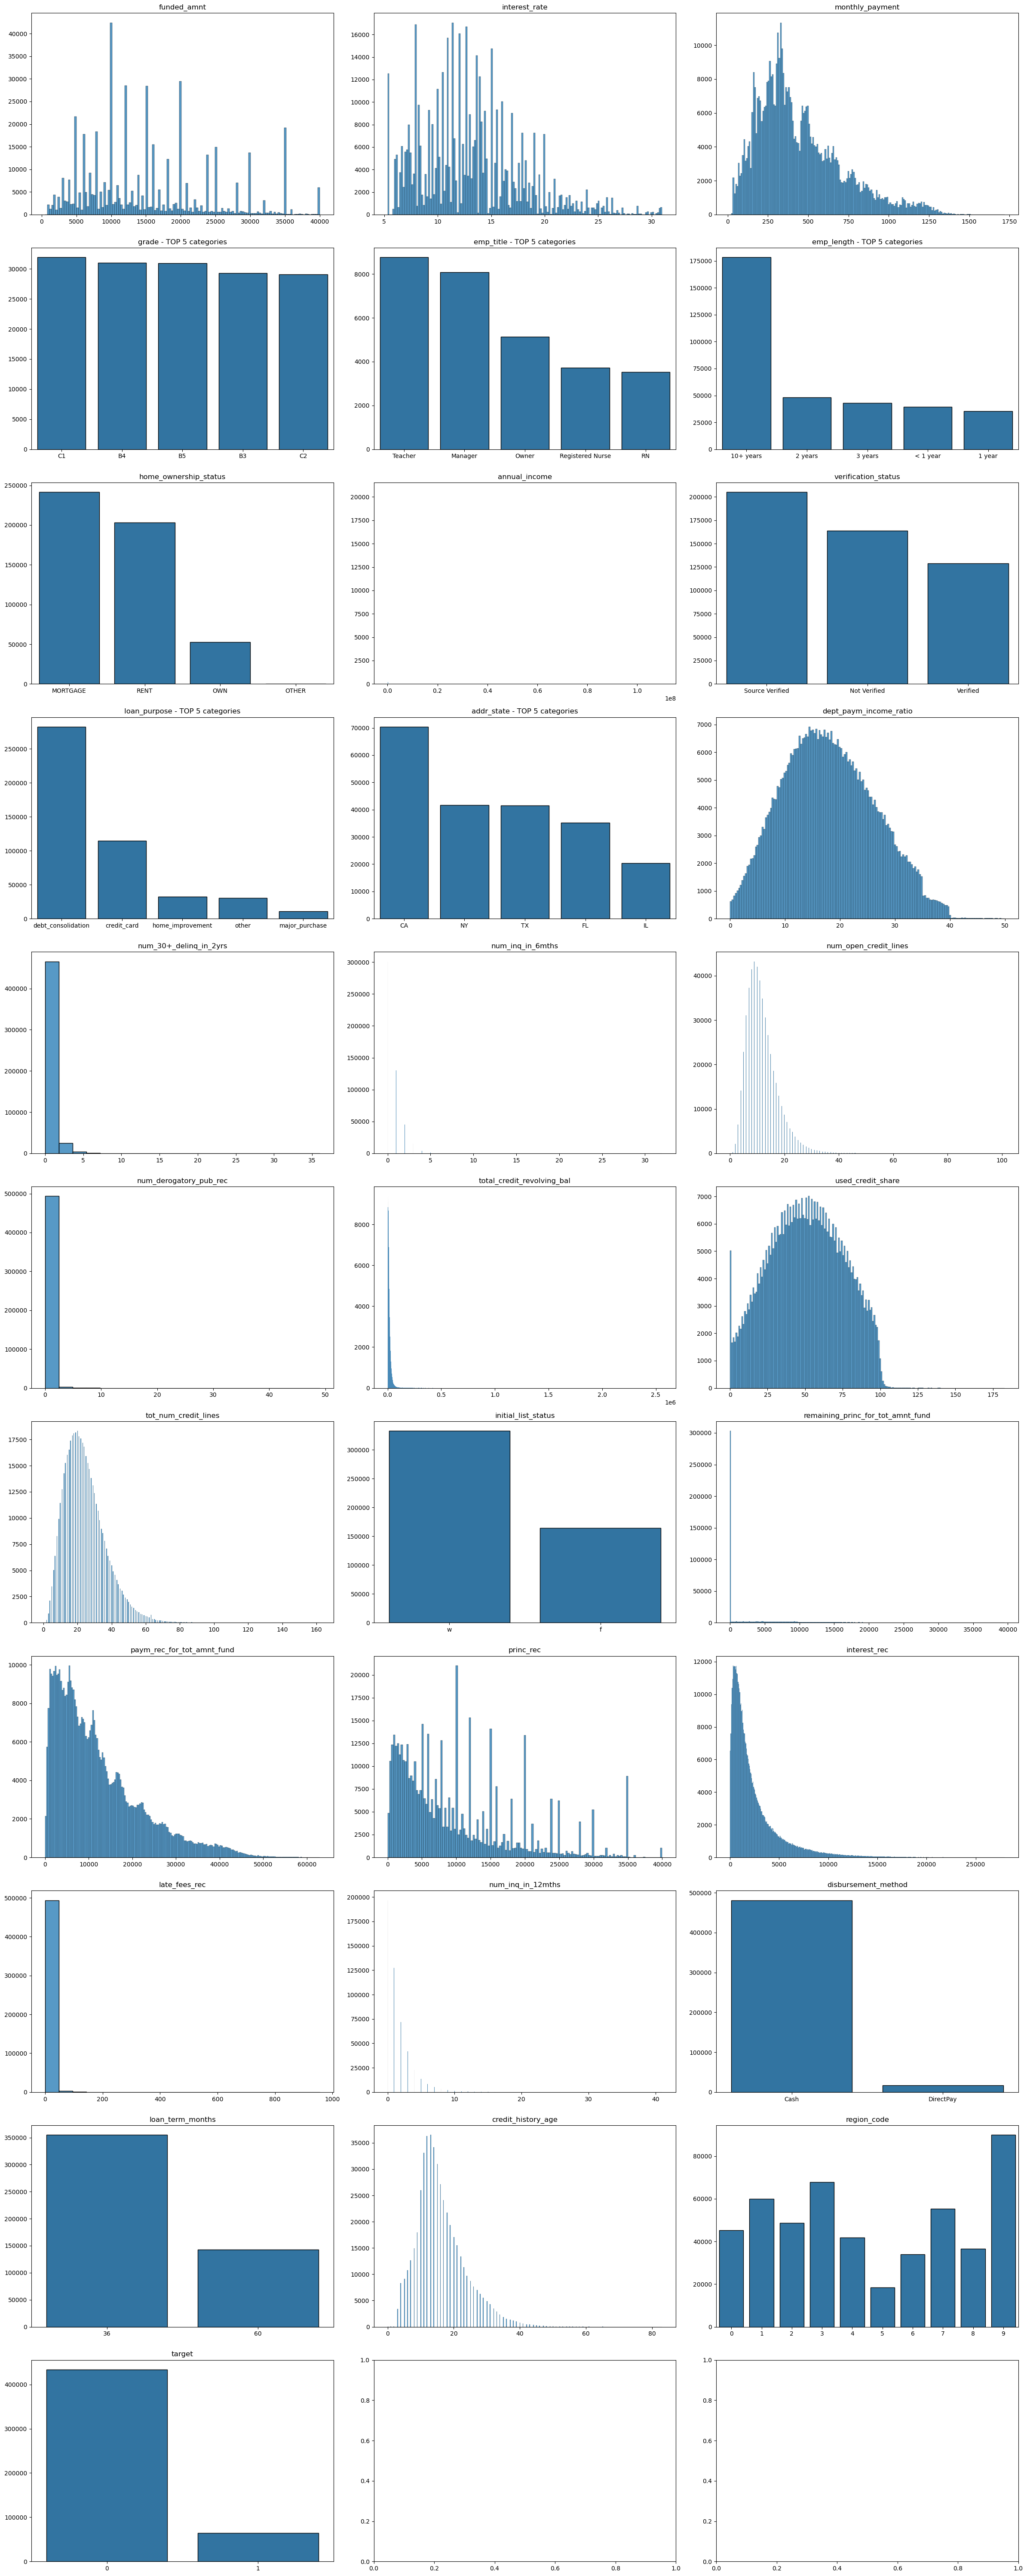

In [25]:
draw_distribution(customer_data, subplot_size=(24, 60), subplot_cols=3)

### "loan_term_months" column has only 2 values so we can treat it as category variable as well as for the "region_code" variable

In [26]:
customer_data['loan_term_months'] = customer_data['loan_term_months'].astype('object')
customer_data['region_code'] = customer_data['region_code'].astype('object')
categorical_data = customer_data.select_dtypes(['object'])
categorical_data.head()

,grade,emp_title,emp_length,home_ownership_status,verification_status,loan_purpose,addr_state,initial_list_status,disbursement_method,loan_term_months,region_code
0,D5,maintenance supervisor,10+ years,MORTGAGE,Not Verified,debt_consolidation,MI,w,Cash,60,4
1,A3,Owner,8 years,RENT,Verified,home_improvement,NY,w,Cash,36,1
2,B3,Pos specialist,10+ years,RENT,Not Verified,debt_consolidation,CA,w,Cash,60,9
3,B5,Estimator,10+ years,OWN,Not Verified,credit_card,FL,w,Cash,60,3
4,E1,Sales VP,3 years,RENT,Not Verified,small_business,OH,w,Cash,36,4


Categorical and numerical statistics (after adjusting variables to the proper groups of data)

In [27]:
categorical_data.describe()

,grade,emp_title,emp_length,home_ownership_status,verification_status,loan_purpose,addr_state,initial_list_status,disbursement_method,loan_term_months,region_code
count,497725,497725,497725,497725,497725,497725,497725,497725,497725,497725,497725
unique,35,166188,11,4,3,14,51,2,2,2,10
top,C1,Teacher,10+ years,MORTGAGE,Source Verified,debt_consolidation,CA,w,Cash,36,9
freq,31921,8763,178357,241621,205153,282505,70437,332985,481189,354954,89941


In [28]:
numerical_data = customer_data.select_dtypes(['int32', 'float32', 'int64', 'float64'])
numerical_data.head()

,funded_amnt,interest_rate,monthly_payment,annual_income,dept_paym_income_ratio,num_30+_delinq_in_2yrs,num_inq_in_6mths,num_open_credit_lines,num_derogatory_pub_rec,total_credit_revolving_bal,used_credit_share,tot_num_credit_lines,remaining_princ_for_tot_amnt_fund,paym_rec_for_tot_amnt_fund,princ_rec,interest_rec,late_fees_rec,num_inq_in_12mths,credit_history_age,target
0,15000,19.53,393.50,55000.00,26.82,0,1,10,1,81,0.30,14,0.00,16723.10,15000.00,1723.10,0.00,2,12,0
1,40000,7.21,1238.93,200000.00,3.31,0,1,11,0,8477,12.50,17,0.00,42871.63,40000.00,2871.63,0.00,3,17,0
2,19200,10.49,412.59,73000.00,14.02,0,0,7,0,6588,37.90,19,0.00,20860.86,19200.00,1660.86,0.00,0,13,0
3,25000,11.53,550.20,80000.00,34.55,0,0,16,0,23490,60.10,50,0.00,30745.04,25000.00,5745.04,0.00,0,21,0
4,9600,23.40,373.62,100000.00,15.79,0,4,19,0,4677,19.20,51,9223.52,728.52,376.48,352.04,0.00,5,14,0


In [29]:
numerical_data_describe = numerical_data.loc[:, numerical_data.columns != 'target'].describe()
numerical_data_describe.loc['unique'] = numerical_data.nunique()
numerical_data_describe.loc['var_coeff [%]'] = 100.0 * numerical_data_describe.loc['std'] / numerical_data_describe.loc['mean']
numerical_data_describe.loc['median'] = numerical_data.median()
numerical_data_describe.loc['skew'] = numerical_data.skew()
numerical_data_describe.loc['kurtosis'] = numerical_data.kurtosis()
numerical_data_describe

,funded_amnt,interest_rate,monthly_payment,annual_income,dept_paym_income_ratio,num_30+_delinq_in_2yrs,num_inq_in_6mths,num_open_credit_lines,num_derogatory_pub_rec,total_credit_revolving_bal,used_credit_share,tot_num_credit_lines,remaining_princ_for_tot_amnt_fund,paym_rec_for_tot_amnt_fund,princ_rec,interest_rec,late_fees_rec,num_inq_in_12mths,credit_history_age
count,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00,497725.00
mean,14978.37,13.06,444.28,80811.03,18.02,0.32,0.59,11.73,0.20,16832.38,50.77,24.38,3956.04,12273.84,9683.05,2447.02,1.49,1.50,16.07
std,9045.71,4.80,263.55,174272.38,8.36,0.89,0.90,5.66,0.58,22990.87,24.59,12.04,7061.85,9974.50,8365.20,2711.23,11.83,2.05,7.36
min,500.00,5.31,14.01,2300.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00
25%,8000.00,9.49,254.05,49000.00,11.77,0.00,0.00,8.00,0.00,6095.00,32.10,16.00,0.00,4643.68,3075.00,719.32,0.00,0.00,11.00
50%,12900.00,12.62,377.87,68000.00,17.52,0.00,0.00,11.00,0.00,11501.00,50.80,23.00,0.00,9639.00,7247.37,1530.93,0.00,1.00,15.00
75%,20000.00,15.80,587.50,95000.00,23.90,0.00,1.00,15.00,0.00,20445.00,69.70,31.00,5627.69,17249.87,14058.23,3127.41,0.00,2.00,20.00
max,40000.00,30.99,1719.83,110000000.00,49.96,36.00,32.00,101.00,49.00,2559552.00,182.80,162.00,39548.64,62948.99,40000.00,27948.99,955.92,41.00,83.00
unique,1546.00,642.00,59787.00,28087.00,4394.00,29.00,22.00,77.00,29.00,63560.00,1196.00,132.00,111919.00,423863.00,159447.00,293325.00,6956.00,38.00,67.00
var_coeff [%],60.39,36.74,59.32,215.65,46.40,280.71,152.45,48.28,294.99,136.59,48.43,49.38,178.51,81.27,86.39,110.80,795.15,136.84,45.82


In [30]:
"""function to determine number of outlier values in a dataframe column"""
def number_of_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return len(outliers)

"""function for drawing boxplots"""
def draw_boxplots(df, subplot_size=(16, 10), subplot_cols=3):
    plot_shape = subplot_shape(df, subplot_cols=subplot_cols)
    fig, axes = plt.subplots(plot_shape[0], plot_shape[1], figsize=subplot_size)
    axes = axes.flatten()
    num_cols = df.shape[1]
    num_outliers = []
    
    for iter, (ax, col) in enumerate(zip(axes, df.columns)):
        boxplot = sns.boxplot(data=df[col], ax=ax)
        num_outliers.append( number_of_outliers(df[col]) )
        ax.set_title(col)
        ax.set_ylabel('')
        ax.grid()
        print(f'\rDrawing boxplots [{iter+1}/{num_cols}]', end='', flush=True)
    print(f'\n{num_outliers}')
    plt.tight_layout()
    plt.show()

Drawing boxplots [19/19]
[6295, 10045, 15618, 25828, 374, 95029, 21605, 12533, 77046, 30068, 29, 11356, 48971, 17415, 14170, 36399, 18871, 23746, 13275]


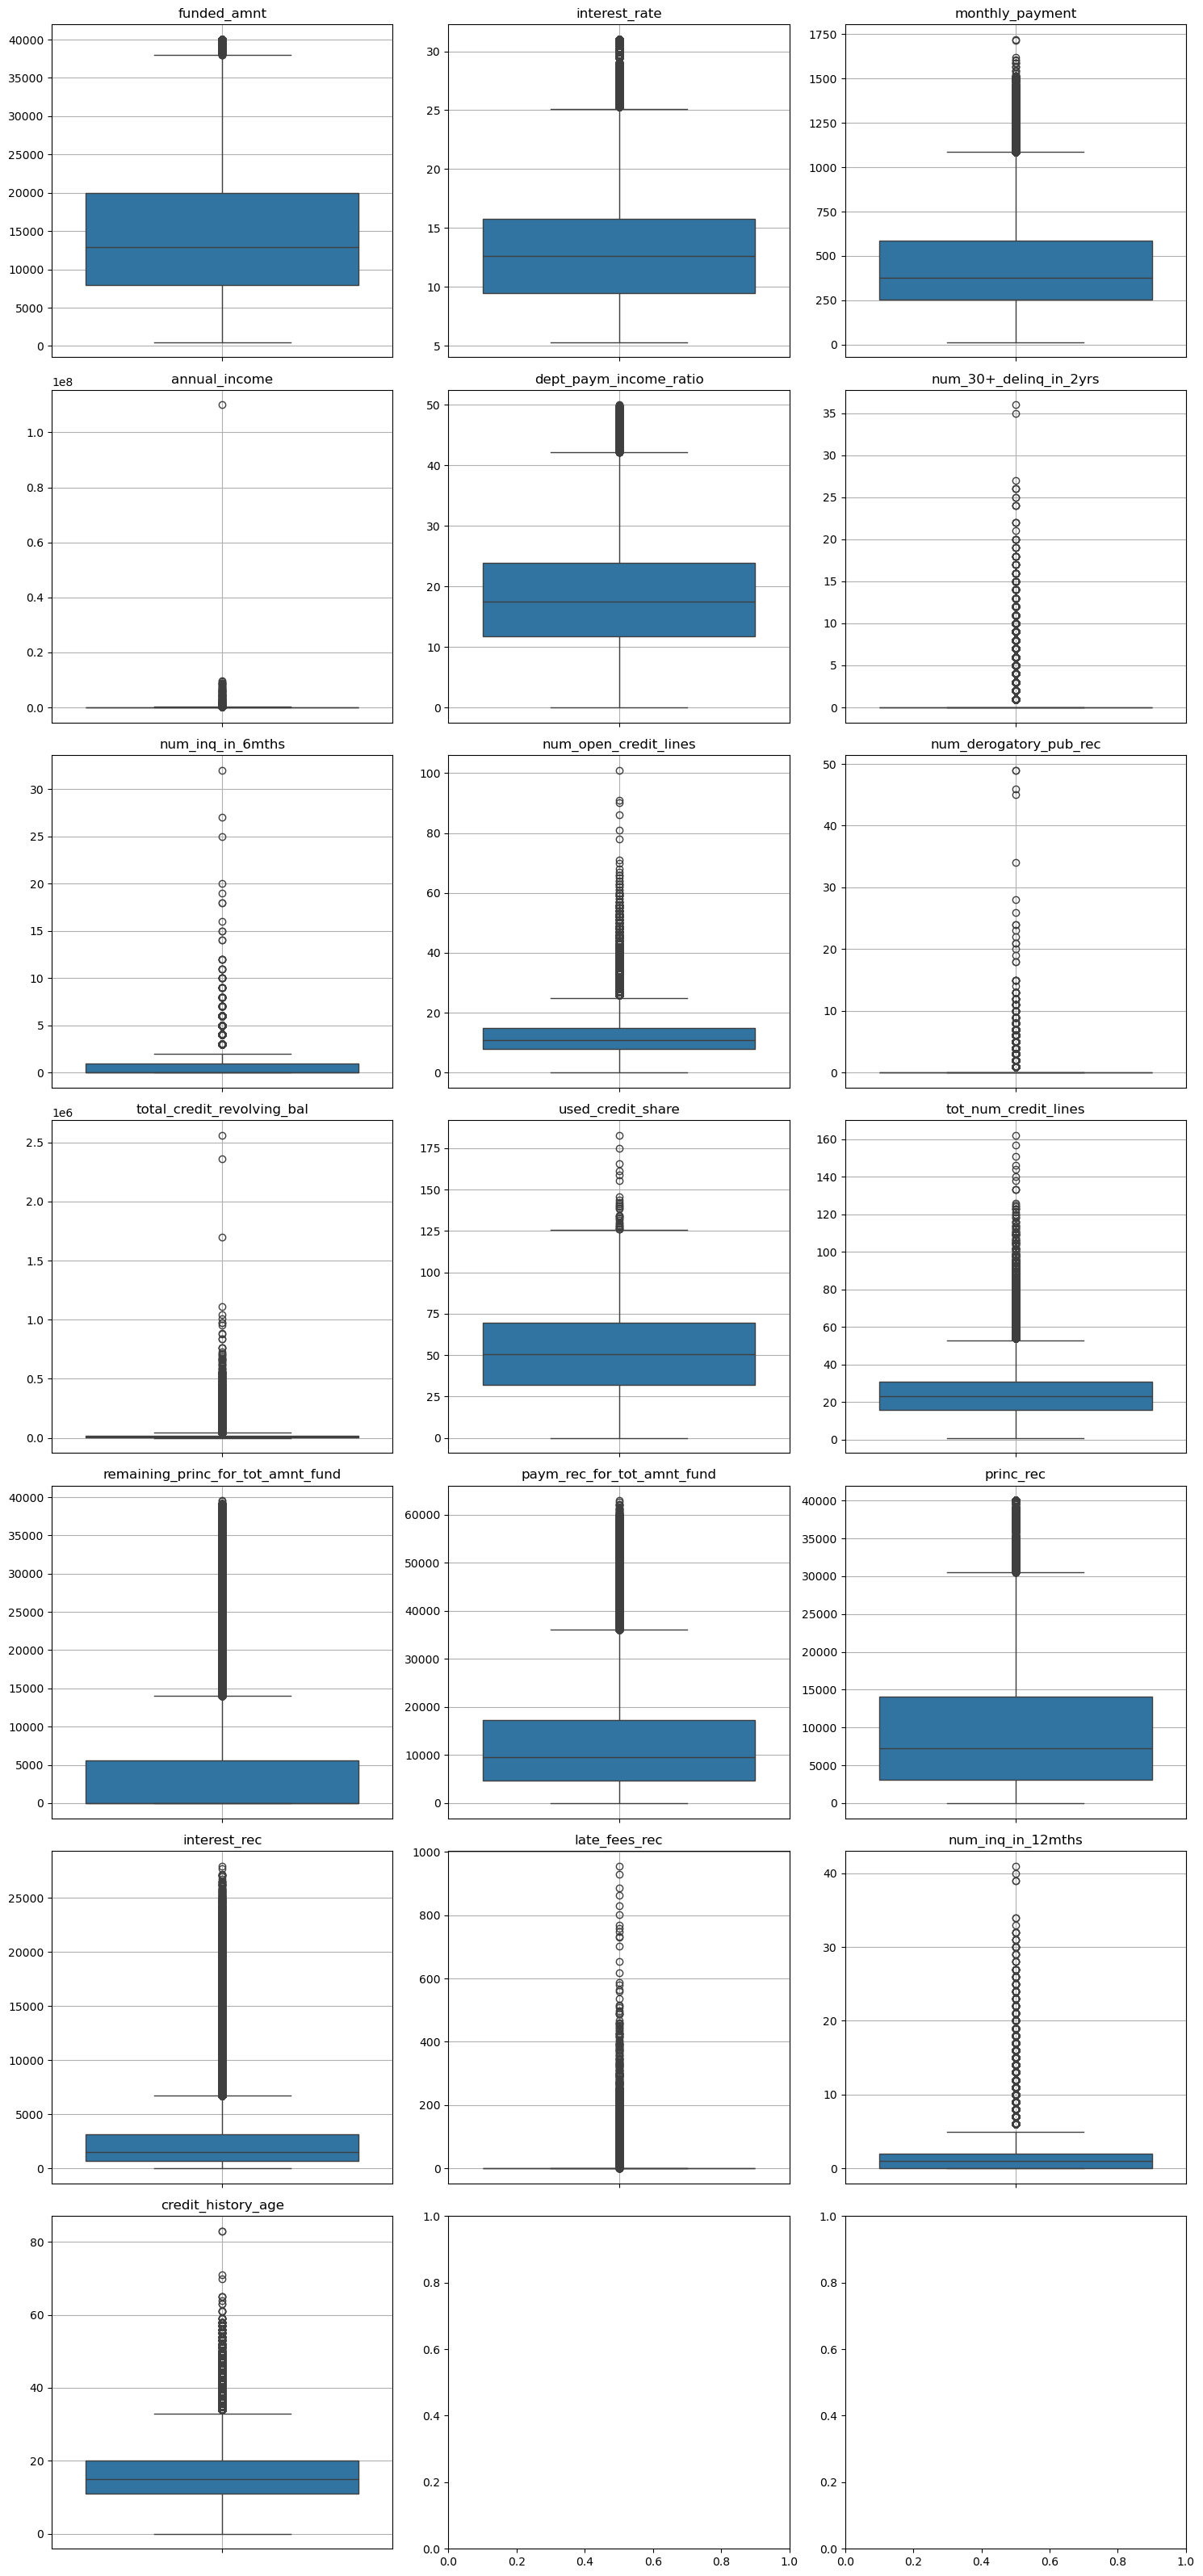

In [31]:
draw_boxplots(numerical_data.drop(columns='target'), subplot_size=(15, 32))

In [32]:
def handle_outliers(df, threshold=1.5, remove=False, replace_val='mean'):
    df_cleaned = df.copy()
    df_numeric = df_cleaned.select_dtypes(include=['int32', 'float32', 'int64', 'float64'])
    
    Q1 = df_numeric.quantile(0.25)
    Q3 = df_numeric.quantile(0.75)
    IQR = Q3 - Q1

    # data serieses for lower and upper bounds for each numeric column
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    if remove == True:
        # condition for numeric columns for handling outliers
        mask = ~((df_numeric < lower_bound) | (df_numeric > upper_bound)).any(axis=1)
        df_cleaned_no_outliers = df_cleaned[mask]
        print(f"Customer dataframe INPUT size: {len(df_cleaned)}")
        print(f"Deleted rows containing outliers: {len(mask[mask==False])}")
        print(f"Customer dataframe OUTPUT size: {len(df_cleaned_no_outliers)}")
        return df_cleaned_no_outliers

    else:
        for col in df_numeric.columns:
            col_dtype = df_cleaned[col].dtype
            if replace_val == 'mean':
                replacement_val = df_cleaned[col].mean()
            elif replace_val == 'median':
                replacement_val = df_cleaned[col].median()

            replacement = col_dtype.type(replacement_val) # setting type of the replacement value corresponding to given column
            outlier_mask_col = ((df_cleaned[col] < lower_bound[col]) | (df_cleaned[col] > upper_bound[col]))
            df_cleaned.loc[outlier_mask_col, col] = replacement

        return df_cleaned

<Axes: >

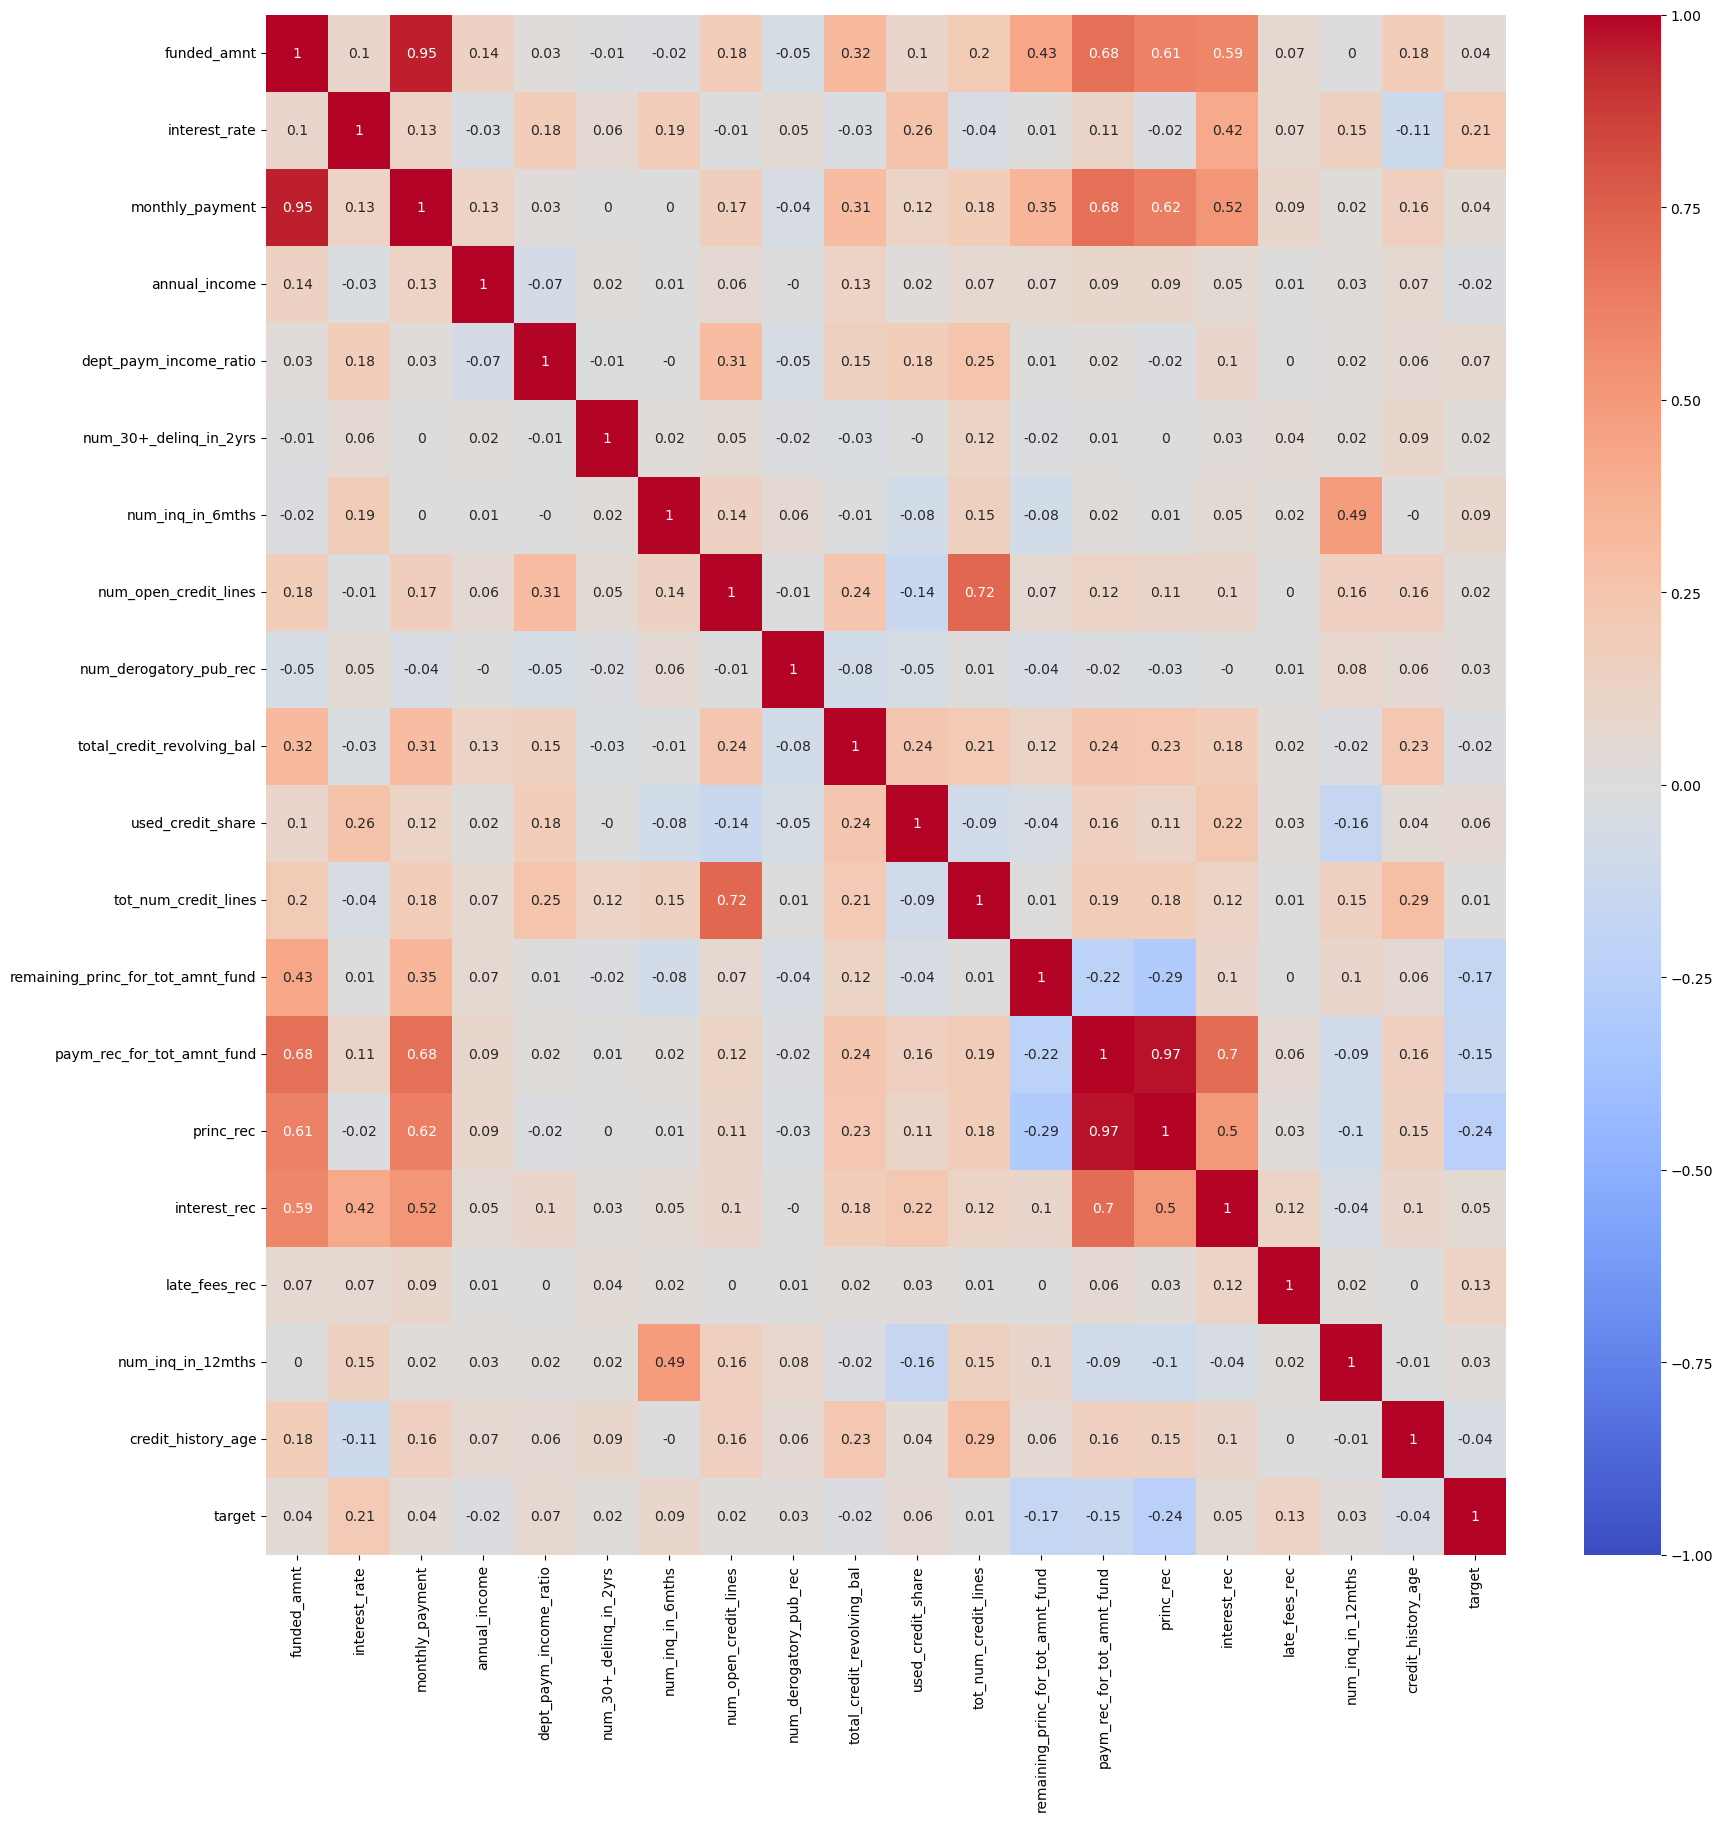

In [33]:
numeric_corr = numerical_data.corr().round(decimals=2)
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

potential columns to reject because of big correlations:
- "monthly_payment", 
- "tot_num_credit_lines"
- "paym_rec_for_tot_amnt_fund" or "princ_rec"

### VIF (Variance Inflation Factor) analysis to determine linearity degree between independent variables

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

"""creating linear models for every independent variable between other independent variables"""
def VIF(numerical_data):    
     X = numerical_data
     X = add_constant(X)

     VIFs = pd.Series(
          [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
          index=X.columns
     )
     return VIFs

print(VIF(numerical_data.drop(columns='target')))

const                                25.64
funded_amnt                          18.50
interest_rate                         1.64
monthly_payment                      11.11
annual_income                         1.04
dept_paym_income_ratio                1.24
num_30+_delinq_in_2yrs                1.04
num_inq_in_6mths                      1.40
num_open_credit_lines                 2.28
num_derogatory_pub_rec                1.03
total_credit_revolving_bal            1.32
used_credit_share                     1.31
tot_num_credit_lines                  2.32
remaining_princ_for_tot_amnt_fund     4.89
paym_rec_for_tot_amnt_fund          305.84
princ_rec                           176.40
interest_rec                         25.10
late_fees_rec                         1.03
num_inq_in_12mths                     1.43
credit_history_age                    1.19
dtype: float64


In [35]:
"""dropping cols that have VIF > 10 because then the linearity might significantly affect quality of the model"""
numerical_data = numerical_data.drop(columns=['monthly_payment', 'princ_rec', 'interest_rec', 'tot_num_credit_lines'])
print(VIF(numerical_data.drop(columns='target')))

const                               21.66
funded_amnt                          5.80
interest_rate                        1.24
annual_income                        1.04
dept_paym_income_ratio               1.23
num_30+_delinq_in_2yrs               1.02
num_inq_in_6mths                     1.39
num_open_credit_lines                1.31
num_derogatory_pub_rec               1.03
total_credit_revolving_bal           1.32
used_credit_share                    1.30
remaining_princ_for_tot_amnt_fund    3.21
paym_rec_for_tot_amnt_fund           4.89
late_fees_rec                        1.01
num_inq_in_12mths                    1.41
credit_history_age                   1.13
dtype: float64


In [36]:
customer_data.head()

,funded_amnt,interest_rate,monthly_payment,grade,emp_title,emp_length,home_ownership_status,annual_income,verification_status,loan_purpose,addr_state,dept_paym_income_ratio,num_30+_delinq_in_2yrs,num_inq_in_6mths,num_open_credit_lines,num_derogatory_pub_rec,total_credit_revolving_bal,used_credit_share,tot_num_credit_lines,initial_list_status,remaining_princ_for_tot_amnt_fund,paym_rec_for_tot_amnt_fund,princ_rec,interest_rec,late_fees_rec,num_inq_in_12mths,disbursement_method,loan_term_months,credit_history_age,region_code,target
0,15000,19.53,393.50,D5,maintenance supervisor,10+ years,MORTGAGE,55000.00,Not Verified,debt_consolidation,MI,26.82,0,1,10,1,81,0.30,14,w,0.00,16723.10,15000.00,1723.10,0.00,2,Cash,60,12,4,0
1,40000,7.21,1238.93,A3,Owner,8 years,RENT,200000.00,Verified,home_improvement,NY,3.31,0,1,11,0,8477,12.50,17,w,0.00,42871.63,40000.00,2871.63,0.00,3,Cash,36,17,1,0
2,19200,10.49,412.59,B3,Pos specialist,10+ years,RENT,73000.00,Not Verified,debt_consolidation,CA,14.02,0,0,7,0,6588,37.90,19,w,0.00,20860.86,19200.00,1660.86,0.00,0,Cash,60,13,9,0
3,25000,11.53,550.20,B5,Estimator,10+ years,OWN,80000.00,Not Verified,credit_card,FL,34.55,0,0,16,0,23490,60.10,50,w,0.00,30745.04,25000.00,5745.04,0.00,0,Cash,60,21,3,0
4,9600,23.40,373.62,E1,Sales VP,3 years,RENT,100000.00,Not Verified,small_business,OH,15.79,0,4,19,0,4677,19.20,51,w,9223.52,728.52,376.48,352.04,0.00,5,Cash,36,14,4,0


In [37]:
categorical_data.describe()

,grade,emp_title,emp_length,home_ownership_status,verification_status,loan_purpose,addr_state,initial_list_status,disbursement_method,loan_term_months,region_code
count,497725,497725,497725,497725,497725,497725,497725,497725,497725,497725,497725
unique,35,166188,11,4,3,14,51,2,2,2,10
top,C1,Teacher,10+ years,MORTGAGE,Source Verified,debt_consolidation,CA,w,Cash,36,9
freq,31921,8763,178357,241621,205153,282505,70437,332985,481189,354954,89941


In [38]:
customer_data = customer_data.drop(columns=['grade', 'emp_title', 'addr_state'])
customer_data.select_dtypes('object').describe()

,emp_length,home_ownership_status,verification_status,loan_purpose,initial_list_status,disbursement_method,loan_term_months,region_code
count,497725,497725,497725,497725,497725,497725,497725,497725
unique,11,4,3,14,2,2,2,10
top,10+ years,MORTGAGE,Source Verified,debt_consolidation,w,Cash,36,9
freq,178357,241621,205153,282505,332985,481189,354954,89941


Categorical values encoding using OneHotEncoder

In [39]:
from sklearn.preprocessing import OneHotEncoder

def encode_categoric_data(df):
    categorical_columns = df.loc[:, df.dtypes == 'object'].columns
    encoding_values = df[categorical_columns].nunique().values
    ohe = OneHotEncoder(sparse_output=False) 
    
    one_hot_encoded = ohe.fit_transform(df[categorical_columns])
    one_hot_df = pd.DataFrame(one_hot_encoded, 
                              index=df.index,
                              columns=ohe.get_feature_names_out(categorical_columns))
    df_encoded = pd.concat([df, one_hot_df], axis=1)
    df_encoded = df_encoded.drop(categorical_columns, axis=1)
    
    for i, (cat_col, encoded_vals) in enumerate(zip(categorical_columns, encoding_values)):
        print(f"{i+1}) {cat_col} - encoded {encoded_vals} categories")
    
    return df_encoded

customer_data = encode_categoric_data(customer_data)

1) emp_length - encoded 11 categories
2) home_ownership_status - encoded 4 categories
3) verification_status - encoded 3 categories
4) loan_purpose - encoded 14 categories
5) initial_list_status - encoded 2 categories
6) disbursement_method - encoded 2 categories
7) loan_term_months - encoded 2 categories
8) region_code - encoded 10 categories


In [40]:
categorical_columns = customer_data.loc[:, customer_data.dtypes == 'object'].columns
customer_data

,funded_amnt,interest_rate,monthly_payment,annual_income,dept_paym_income_ratio,num_30+_delinq_in_2yrs,num_inq_in_6mths,num_open_credit_lines,num_derogatory_pub_rec,total_credit_revolving_bal,used_credit_share,tot_num_credit_lines,remaining_princ_for_tot_amnt_fund,paym_rec_for_tot_amnt_fund,princ_rec,interest_rec,late_fees_rec,num_inq_in_12mths,credit_history_age,target,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_status_MORTGAGE,home_ownership_status_OTHER,home_ownership_status_OWN,home_ownership_status_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loan_purpose_car,loan_purpose_credit_card,loan_purpose_debt_consolidation,loan_purpose_educational,loan_purpose_home_improvement,loan_purpose_house,loan_purpose_major_purchase,loan_purpose_medical,loan_purpose_moving,loan_purpose_other,loan_purpose_renewable_energy,loan_purpose_small_business,loan_purpose_vacation,loan_purpose_wedding,initial_list_status_f,initial_list_status_w,disbursement_method_Cash,disbursement_method_DirectPay,loan_term_months_36,loan_term_months_60,region_code_0,region_code_1,region_code_2,region_code_3,region_code_4,region_code_5,region_code_6,region_code_7,region_code_8,region_code_9
0,15000,19.53,393.50,55000.00,26.82,0,1,10,1,81,0.30,14,0.00,16723.10,15000.00,1723.10,0.00,2,12,0,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
1,40000,7.21,1238.93,200000.00,3.31,0,1,11,0,8477,12.50,17,0.00,42871.63,40000.00,2871.63,0.00,3,17,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,19200,10.49,412.59,73000.00,14.02,0,0,7,0,6588,37.90,19,0.00,20860.86,19200.00,1660.86,0.00,0,13,0,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3,25000,11.53,550.20,80000.00,34.55,0,0,16,0,23490,60.10,50,0.00,30745.04,25000.00,5745.04,0.00,0,21,0,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
4,9600,23.40,373.62,100000.00,15.79,0,4,19,0,4677,19.20,51,9223.52,728.52,376.48,352.04,0.00,5,14,0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497720,28000,8.46,883.38,412500.00,21.96,0,0,25,0,50346,45.80,49,23810.89,5287.12,4189.11,1098.01,0.00,0,14,0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
497721,5350,10.91,174.93,65000.00,21.95,0,0,14,0,11581,31.10,15,0.00,5805.42,5350.00,455.42,0.00,0,6,0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0

In [41]:
customer_data['target'].value_counts()

target
0    433532
1     64193
Name: count, dtype: int64

In [42]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
cols_to_transform = customer_data.loc[:, :'credit_history_age'].columns

"""creating copy of dataframe because for other methods such us Decision Trees there might not be need to scale data"""
customer_data_scaled = customer_data.copy() 
customer_data_scaled[cols_to_transform] = minmax_scaler.fit_transform( customer_data_scaled[cols_to_transform] )
customer_data_scaled.head()

,funded_amnt,interest_rate,monthly_payment,annual_income,dept_paym_income_ratio,num_30+_delinq_in_2yrs,num_inq_in_6mths,num_open_credit_lines,num_derogatory_pub_rec,total_credit_revolving_bal,used_credit_share,tot_num_credit_lines,remaining_princ_for_tot_amnt_fund,paym_rec_for_tot_amnt_fund,princ_rec,interest_rec,late_fees_rec,num_inq_in_12mths,credit_history_age,target,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_status_MORTGAGE,home_ownership_status_OTHER,home_ownership_status_OWN,home_ownership_status_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loan_purpose_car,loan_purpose_credit_card,loan_purpose_debt_consolidation,loan_purpose_educational,loan_purpose_home_improvement,loan_purpose_house,loan_purpose_major_purchase,loan_purpose_medical,loan_purpose_moving,loan_purpose_other,loan_purpose_renewable_energy,loan_purpose_small_business,loan_purpose_vacation,loan_purpose_wedding,initial_list_status_f,initial_list_status_w,disbursement_method_Cash,disbursement_method_DirectPay,loan_term_months_36,loan_term_months_60,region_code_0,region_code_1,region_code_2,region_code_3,region_code_4,region_code_5,region_code_6,region_code_7,region_code_8,region_code_9
0,0.37,0.55,0.22,0.00,0.54,0.00,0.03,0.10,0.02,0.00,0.00,0.08,0.00,0.27,0.38,0.06,0.00,0.05,0.14,0,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
1,1.00,0.07,0.72,0.00,0.07,0.00,0.03,0.11,0.00,0.00,0.07,0.10,0.00,0.68,1.00,0.10,0.00,0.07,0.20,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.47,0.20,0.23,0.00,0.28,0.00,0.00,0.07,0.00,0.00,0.21,0.11,0.00,0.33,0.48,0.06,0.00,0.00,0.16,0,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3,0.62,0.24,0.31,0.00,0.69,0.00,0.00,0.16,0.00,0.01,0.33,0.30,0.00,0.49,0.62,0.21,0.00,0.00,0.25,0,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.23,0.70,0.21,0.00,0.32,0.00,0.12,0.19,0.00,0.00,0.11,0.31,0.23,0.01,0.01,0.01,0.00,0.12,0.17,0,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00


### Logistic Regression Model

In [43]:
from sklearn import linear_model

X = customer_data_scaled.drop(columns='target')
y = customer_data_scaled['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=68, stratify=customer_data['target'])
log_regression_model = linear_model.LogisticRegression(class_weight='balanced')

log_regression_model.fit(X_train, y_train)
y_train_probs = log_regression_model.predict_proba(X_train)
y_probs = log_regression_model.predict_proba(X_test)

(y_train_probs, y_probs)

c:\Users\Radek\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([[0.55388008, 0.44611992],
        [0.87775653, 0.12224347],
        [0.84205271, 0.15794729],
        ...,
        [0.86490171, 0.13509829],
        [0.83980488, 0.16019512],
        [0.96612053, 0.03387947]]),
 array([[1.14835539e-04, 9.99885164e-01],
        [7.89443274e-01, 2.10556726e-01],
        [8.87801301e-01, 1.12198699e-01],
        ...,
        [9.78274904e-01, 2.17250964e-02],
        [8.00854648e-01, 1.99145352e-01],
        [9.86898273e-01, 1.31017268e-02]]))

In [ ]:
y_train_val_counts = y_train.value_counts()
y_test_val_counts = y_test.value_counts()

cut_prob = 0.5
y_train_pred = np.where(y_train_probs[:, 0] > cut_prob, 0, 1)
y_pred = np.where(y_probs[:, 0] > cut_prob, 0, 1)

### Confusion Matrices

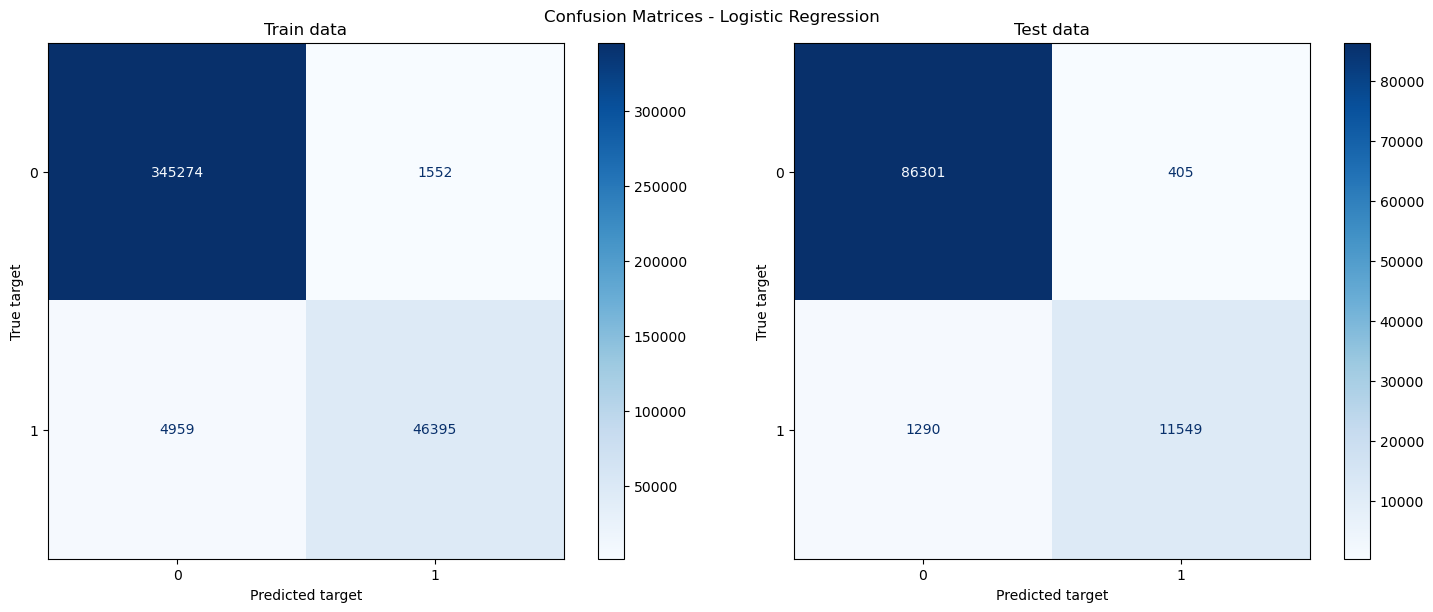

Train data:
Precision: 0.97
Recall score: 0.90
F1-score: 0.93


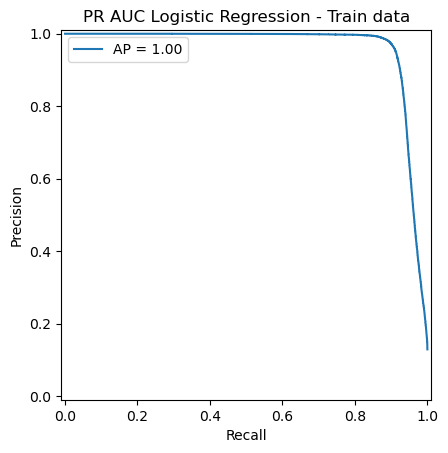


Test data:
Precision: 0.97
Recall score: 0.90
F1-score: 0.93


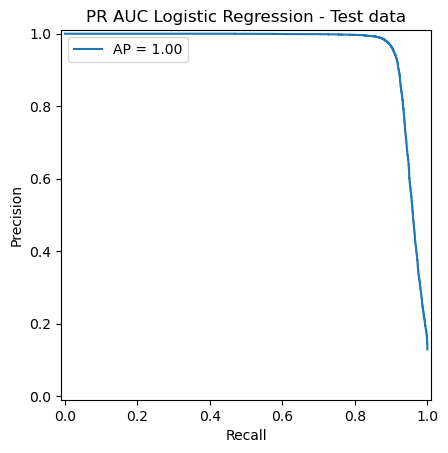

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, \
    f1_score, precision_recall_curve, PrecisionRecallDisplay

def display_confusion_matrix(y_train, y_train_pred, y_test, y_pred, title='', cmap='cividis'):
    cm_train = confusion_matrix(y_true=y_train, y_pred=y_train_pred, labels=[0, 1])
    cm_test = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=[0, 1])

    cm_train_disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[0, 1])
    cm_test_disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1])
    cms_disp = [cm_train_disp, cm_test_disp]

    fig, axes = plt.subplots(1, 2, figsize=(15, 6)); axes = axes.flatten();
    for i, (ax, cm) in enumerate(zip(axes, cms_disp)):
        cm.plot(ax=ax, cmap=cmap)
        cm_title = 'Train data' if i == 0 else 'Test data'
        ax.set_xlabel('Predicted target')
        ax.set_ylabel('True target')
        ax.set_title(cm_title)
    fig.suptitle(t=title)
    plt.tight_layout()
    plt.show()
    return cm_train, cm_test

def display_quality_metrics(y_true, y_pred, y_probs, label='Test data', pr_curve_title=''):
    print(f"{label}:")
    print(f"Precision: {precision_score(y_true=y_true, y_pred=y_pred):.2f}")
    print(f"Recall score: {recall_score(y_true=y_true, y_pred=y_pred):.2f}")
    print(f"F1-score: {f1_score(y_true=y_true, y_pred=y_pred):.2f}")
    precisions, recalls, _ = precision_recall_curve(y_true=y_true, probas_pred=y_probs[:, 1])
    pr_curve_disp = PrecisionRecallDisplay(precision=precisions, recall=recalls, average_precision=True)
    pr_curve_disp.plot()
    plt.title(pr_curve_title)
    plt.legend()
    plt.show()

cm_train, cm_test = display_confusion_matrix(y_train=y_train, y_train_pred=y_train_pred, 
                                             y_test=y_test, y_pred=y_pred, 
                                             title='Confusion Matrices - Logistic Regression', cmap='Blues')
display_quality_metrics(y_true=y_train, 
                        y_pred=y_train_pred, 
                        y_probs=y_train_probs, 
                        label='Train data', 
                        pr_curve_title='PR AUC Logistic Regression - Train data')
display_quality_metrics(y_true=y_test, 
                        y_pred=y_pred, 
                        y_probs=y_probs,
                        label='\nTest data',
                        pr_curve_title='PR AUC Logistic Regression - Test data')

In [46]:
import time
import xgboost as xgb

